In [ ]:
# import kagglehub
# path = kagglehub.dataset_download("warcoder/soyabean-seeds")

# print("Path to dataset files:", path)

In [1]:
dataset_path = "raw_data/Soybean Seeds"
train_path = "raw_data/train"
val_path = "raw_data/val"
test_path = "raw_data/test"

In [2]:
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shutil

In [3]:
os.makedirs(train_path, exist_ok=True)
os.makedirs(val_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)

In [ ]:
# train_ratio = 0.7
# val_ratio = .15

# for class_folder in os.listdir(dataset_path):
#     class_path = os.path.join(dataset_path, class_folder)
#     images = os.listdir(class_path)
#     random.shuffle(images)

#     # Calculate the split index
#     split_index = int(train_ratio * len(images))
#     val_len = int(len(images) * (1-val_ratio))

#     # Split the images into training and testing sets
#     train_images = images[:split_index]
#     val_images = images[split_index:val_len]
#     test_images = images[val_len:]

#     # Create class folders in the training and testing directories
#     train_class_path = os.path.join(train_path, class_folder)
#     val_class_path = os.path.join(val_path, class_folder)
#     test_class_path = os.path.join(test_path, class_folder)
#     os.makedirs(train_class_path, exist_ok=True)
#     os.makedirs(val_class_path, exist_ok=True)
#     os.makedirs(test_class_path, exist_ok=True)

#     # Move images to the respective class folders in training and testing
#     for image in train_images:
#         src = os.path.join(class_path, image)
#         dest = os.path.join(train_class_path, image)
#         shutil.copy(src, dest)

#     for image in val_images:
#         src = os.path.join(class_path, image)
#         dest = os.path.join(val_class_path, image)
#         shutil.copy(src, dest)

#     for image in test_images:
#         src = os.path.join(class_path, image)
#         dest = os.path.join(test_class_path, image)
#         shutil.copy(src, dest)

In [4]:
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img



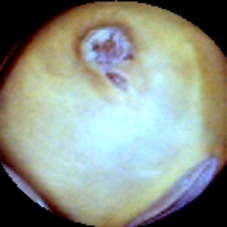

In [5]:
img = load_img(f'{train_path}/Broken soybeans/3.jpg')
x = img_to_array(img)/255
img

In [6]:
x.shape

(227, 227, 3)

In [7]:
train_dir = "raw_data/train"
val_dir = "raw_data/test"
test_dir = "raw_data/test"

In [8]:
train_df = pd.DataFrame(columns=["path", "class"])
val_df = pd.DataFrame(columns=["path", "class"])
test_df = pd.DataFrame(columns=["path", "class"])

In [9]:
# for class_name in os.listdir(train_dir):
#   class_dir = os.path.join(train_dir, class_name)
#   for image_name in os.listdir(class_dir):
#     image_path = os.path.join(class_dir, image_name)
#     train_df.loc[len(train_df.index)] = [image_path, class_name] 

# for class_name in os.listdir(test_dir):
#   class_dir = os.path.join(test_dir, class_name)
#   for image_name in os.listdir(class_dir):
#     image_path = os.path.join(class_dir, image_name)
#     test_df.loc[len(test_df.index)] = [image_path, class_name]

# for class_name in os.listdir(val_dir):
#   class_dir = os.path.join(val_dir, class_name)
#   for image_name in os.listdir(class_dir):
#     image_path = os.path.join(class_dir, image_name)
#     val_df.loc[len(val_df.index)] = [image_path, class_name]

In [10]:
# train_df.info(), val_df.info(), test_df.info()

In [11]:
# test_df.head()

In [12]:
def plot_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    ax[0].set_title('loss')
    ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
    ax[1].set_title('accuracy')
    ax[1].plot(history.epoch, history.history["accuracy"], label="Train acc")
    ax[1].plot(history.epoch, history.history["val_accuracy"], label="Validation acc")
    ax[0].legend()
    ax[1].legend()

In [13]:
def plot_compare_history(history, name_history, history_1, name_history_1):

    fig, ax = plt.subplots(1, 2, figsize=(15,5))

    ax[0].set_title('loss')

    ax[0].plot(history.epoch, history.history["loss"], label="Train loss " + name_history)
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss " + name_history)

    ax[0].plot(history_1.epoch, history_1.history["loss"], label="Train loss " + name_history_1)
    ax[0].plot(history_1.epoch, history_1.history["val_loss"], label="Validation loss " + name_history_1)

    ax[1].set_title('Accuracy')

    ax[1].plot(history.epoch, history.history["accuracy"], label="Train Accuracy " + name_history)
    ax[1].plot(history.epoch, history.history["val_accuracy"], label="Validation Accuracy " + name_history)

    ax[1].plot(history_1.epoch, history_1.history["accuracy"], label="Train Accuracy " + name_history_1)
    ax[1].plot(history_1.epoch, history_1.history["val_accuracy"], label="Validation Accuracy " + name_history_1)

    ax[0].legend()
    ax[1].legend()

In [14]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers, optimizers, callbacks
from tensorflow.keras.utils import image_dataset_from_directory

# PRIMEIRO MODELO

In [15]:
model = Sequential()

model.add(layers.Rescaling(1/255, input_shape=(227,227,3)))

model.add(layers.RandomFlip(mode='horizontal_and_vertical'))

model.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))
model.add(layers.MaxPool2D(pool_size=(5,5), padding='same'))

model.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))
model.add(layers.MaxPool2D(pool_size=(3,3), padding='same'))

model.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(layers.MaxPool2D(pool_size=(2,2), padding='same'))

model.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'))
model.add(layers.MaxPool2D(pool_size=(2,2), padding='same'))

model.add(layers.Flatten())

model.add(layers.Dense(96, activation='relu'))
model.add(layers.Dropout(.5))

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(.5))

model.add(layers.Dense(5,activation="softmax"))

model.summary()

/Users/joaobassi/.pyenv/versions/3.10.6/envs/soybean_classification/lib/python3.10/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 227, 227, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_flip (RandomFlip)        │ (None, 227, 227, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 227, 227, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 46, 46, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 46, 46, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 96)             │       196,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305,733 (1.17 MB)

 Trainable params: 305,733 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

# MODELO MELHORADO

In [16]:
# model = Sequential()

# model.add(layers.Rescaling(1/255, input_shape=(227,227,3)))

# model.add(layers.RandomFlip(mode='horizontal_and_vertical'))

# model.add(layers.Conv2D(filters=64, kernel_size=(5,5), activation='relu', padding='same'))
# model.add(layers.MaxPool2D(pool_size=(5,5), padding='same'))

# model.add(layers.Conv2D(filters=64, kernel_size=(4,4), activation='relu', padding='same'))
# model.add(layers.MaxPool2D(pool_size=(3,3), padding='same'))

# model.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'))
# model.add(layers.MaxPool2D(pool_size=(2,2), padding='same'))
# model.add(layers.Dropout(.3))

# model.add(layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same'))
# model.add(layers.MaxPool2D(pool_size=(2,2), padding='same'))
# model.add(layers.Dropout(.5))

# model.add(layers.Flatten())

# model.add(layers.Dense(128, activation='relu'))
# model.add(layers.Dropout(.5))

# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dropout(.5))

# model.add(layers.Dense(5,activation="softmax"))

# model.summary()

# VGG16

In [17]:
# model = Sequential()

# model.add(layers.Rescaling(1/255, input_shape=(227,227,3)))

# model.add(layers.RandomFlip(mode='horizontal_and_vertical'))

# model.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
# model.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
# model.add(layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='same'))

# model.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'))
# model.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'))
# model.add(layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='same'))

# model.add(layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same'))
# model.add(layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same'))
# model.add(layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same'))
# model.add(layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='same'))

# model.add(layers.Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same'))
# model.add(layers.Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same'))
# model.add(layers.Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same'))
# model.add(layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='same'))

# model.add(layers.Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same'))
# model.add(layers.Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same'))
# model.add(layers.Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same'))
# model.add(layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='same'))

# model.add(layers.Flatten())

# model.add(layers.Dense(256, activation='relu'))

# model.add(layers.Dense(128, activation='relu'))

# model.add(layers.Dense(5,activation="softmax"))

# model.summary()

In [18]:
from tensorflow.keras.layers import Dense,Flatten,Conv2D,Activation,Dropout,MaxPool2D

In [19]:
# model = Sequential()
# model.add(Conv2D(input_shape=(227,227,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
# model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),name='vgg16'))
# model.add(Flatten(name='flatten'))
# model.add(Dense(256, activation='relu', name='fc1'))
# model.add(Dense(128, activation='relu', name='fc2'))
# model.add(Dense(5, activation='softmax', name='output'))

In [20]:
# opt = optimizers.SGD(learning_rate=1e-6, momentum=0.9)
# model.compile(loss="categorical_crossentropy",
#               optimizer=opt,
#               metrics=["accuracy"])

In [23]:
adam = optimizers.Adam(learning_rate = .001)
model.compile(loss='categorical_crossentropy',
             optimizer=adam,
             metrics=['accuracy'])

In [24]:
batch_size = 32
train_ds = image_dataset_from_directory(
    train_dir,
    labels = 'inferred',
    label_mode = 'categorical',
    class_names = ['Broken soybeans', 'Immature soybeans', 'Intact soybeans', 'Skin-damaged soybeans', 'Spotted soybeans'],
    image_size=(227,227),
    batch_size=batch_size
)

val_ds = image_dataset_from_directory(
    val_dir,
    labels="inferred",
    label_mode = 'categorical',
    class_names = ['Broken soybeans', 'Immature soybeans', 'Intact soybeans', 'Skin-damaged soybeans', 'Spotted soybeans'],
    image_size=(227,227),
    batch_size=batch_size
)


Found 3856 files belonging to 5 classes.
Found 830 files belonging to 5 classes.


In [25]:
class_names = train_ds.class_names
print(class_names)

['Broken soybeans', 'Immature soybeans', 'Intact soybeans', 'Skin-damaged soybeans', 'Spotted soybeans']


In [26]:
MODEL = "model_1.keras"

modelCheckpoint = callbacks.ModelCheckpoint(MODEL,
                                            monitor="val_accuracy",
                                            verbose=0,
                                            save_best_only=True)

LRreducer = callbacks.ReduceLROnPlateau(monitor="val_accuracy",
                                        factor=0.1,
                                        patience=3,
                                        verbose=1,
                                        min_lr=0)

EarlyStopper = callbacks.EarlyStopping(monitor='val_accuracy',
                                       patience=30,
                                       verbose=0,
                                       restore_best_weights=True)

In [27]:
%%time
history = model.fit(
        train_ds,
        epochs=30000,
        validation_data=val_ds,
        callbacks=[modelCheckpoint, LRreducer, EarlyStopper]
        )

Epoch 1/30000
121/121 ━━━━━━━━━━━━━━━━━━━━ 16s 125ms/step - accuracy: 0.2082 - loss: 1.6150 - val_accuracy: 0.2060 - val_loss: 1.5942 - learning_rate: 0.0010
Epoch 2/30000
121/121 ━━━━━━━━━━━━━━━━━━━━ 15s 125ms/step - accuracy: 0.2775 - loss: 1.5637 - val_accuracy: 0.3446 - val_loss: 1.4199 - learning_rate: 0.0010
Epoch 3/30000
121/121 ━━━━━━━━━━━━━━━━━━━━ 15s 127ms/step - accuracy: 0.3675 - loss: 1.3823 - val_accuracy: 0.5289 - val_loss: 1.1409 - learning_rate: 0.0010
Epoch 4/30000
121/121 ━━━━━━━━━━━━━━━━━━━━ 15s 126ms/step - accuracy: 0.4621 - loss: 1.1905 - val_accuracy: 0.5422 - val_loss: 1.0648 - learning_rate: 0.0010
Epoch 5/30000
121/121 ━━━━━━━━━━━━━━━━━━━━ 16s 128ms/step - accuracy: 0.4769 - loss: 1.0965 - val_accuracy: 0.5675 - val_loss: 0.9838 - learning_rate: 0.0010
Epoch 6/30000
121/121 ━━━━━━━━━━━━━━━━━━━━ 15s 127ms/step - accuracy: 0.5358 - loss: 1.0085 - val_accuracy: 0.5880 - val_loss: 0.9087 - learning_rate: 0.0010
Epoch 7/30000
121/121 ━━━━━━━━━━━━━━━━━━━━ 15s 126ms

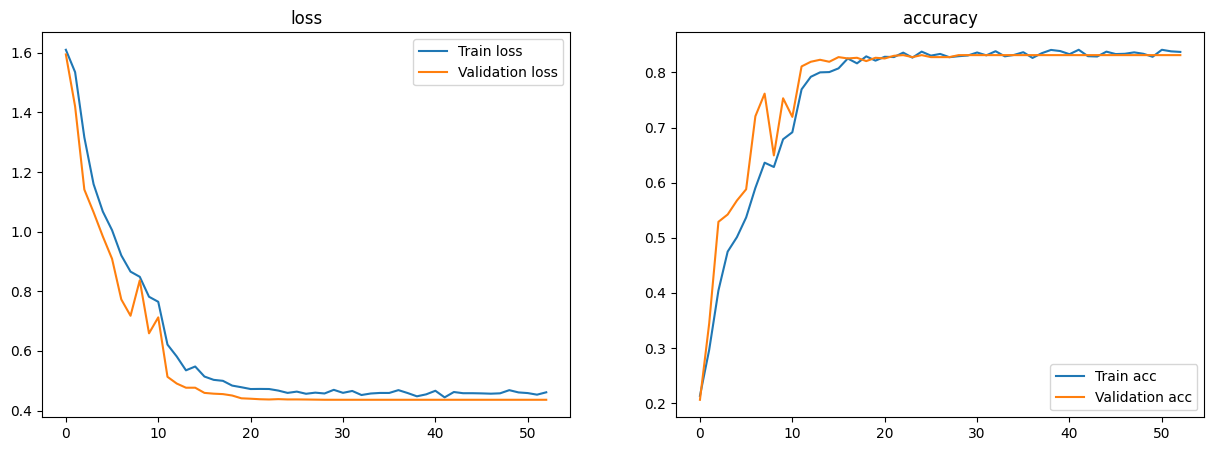

In [28]:
plot_history(history)